## 1. Setup and Load Data

In [118]:
import tensorflow as tf
import cv2

In [119]:
print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)

TensorFlow version: 2.18.0
OpenCV version: 4.10.0


In [120]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
altair                       5.4.1
altgraph                     0.17.2
appnope                      0.1.4
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        24.2.0
babel                        2.16.0
blinker                      1.8.2
cachetools                   5.5.0
certifi                      2024.8.30
charset-normalizer           3.3.2
click                        8.1.7
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.8
decorator                    5.1.1
distlib                      0.3.8
exceptiongroup               1.2.2
executing                    2.1.0
filelock                     3.16.1
flatbuffers                  24.3.25
fonttools                    4.54.1
future                       0.1

In [121]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [122]:
import os

In [123]:
os.listdir('Potato Pest Dataset')

['SL15 Myzus persicae (Sulzer)',
 '.DS_Store',
 'SL17 Phthorimaea operculella (Zeller)',
 'SL01 Agrotis ipsilon (Hufnagel)',
 'SL05 Bemisia tabaci (Gennadius)',
 'SL10 Epilachna vigintioctopunctata (Fabricius)',
 'SL03 Aphis gossypii Glover',
 'SL06 Brachytrypes portentosus Lichtenstein',
 'SL02 Amrasca devastans (Distant)']

In [124]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [125]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [126]:
# Avoid OOM errors by setting GPU Memory Consumption Growth 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove images 

In [127]:
import cv2 
import imghdr
from matplotlib import pyplot as plt 

In [128]:
data_dir = 'Potato Pest Dataset'

In [129]:
os.listdir(os.path.join(data_dir, 'SL15 Myzus persicae (Sulzer)'))

['Myzus persicae (Sulzer)_53.jpg',
 'Myzus persicae (Sulzer)_47.jpg',
 'Myzus persicae (Sulzer)_46.jpg',
 'Myzus persicae (Sulzer)_52.jpg',
 'Myzus persicae (Sulzer)_44.jpg',
 'Myzus persicae (Sulzer)_50.jpg',
 'Myzus persicae (Sulzer)_51.jpg',
 'Myzus persicae (Sulzer)_45.jpg',
 'Myzus persicae (Sulzer)_69.jpg',
 'Myzus persicae (Sulzer)_41.jpg',
 'Myzus persicae (Sulzer)_55.jpg',
 'Myzus persicae (Sulzer)_54.jpg',
 'Myzus persicae (Sulzer)_40.jpg',
 'Myzus persicae (Sulzer)_68.jpg',
 'Myzus persicae (Sulzer)_56.jpg',
 'Myzus persicae (Sulzer)_42.jpg',
 'Myzus persicae (Sulzer)_43.jpg',
 'Myzus persicae (Sulzer)_57.jpg',
 'Myzus persicae (Sulzer)_1.jpg',
 'Myzus persicae (Sulzer)_30.jpg',
 'Myzus persicae (Sulzer)_24.jpg',
 'Myzus persicae (Sulzer)_18.jpg',
 'Myzus persicae (Sulzer)_19.jpg',
 'Myzus persicae (Sulzer)_25.jpg',
 'Myzus persicae (Sulzer)_31.jpg',
 'Myzus persicae (Sulzer)_2.jpg',
 'Myzus persicae (Sulzer)_27.jpg',
 'Myzus persicae (Sulzer)_33.jpg',
 'Myzus persicae (Sulz

In [130]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [131]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    # Skip if it's not a directory
    if not os.path.isdir(class_path):
        continue
    
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list: {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image: {image_path}')

## 1.3 Load Data

In [132]:
import numpy as np 
from matplotlib import pyplot as plt 

In [133]:
data = tf.keras.utils.image_dataset_from_directory('Potato Pest Dataset')

Found 494 files belonging to 8 classes.


In [134]:
data_iterator = data.as_numpy_iterator()

In [135]:
# Get another batch from the iterator 
batch = data_iterator.next()

In [136]:
len(batch)
# Images represented as numpy arrays 
batch[0].shape

(32, 256, 256, 3)

In [137]:
class_names = {
    0: "SL15 Myzus persicae (Sulzer)",
    1: "SL17 Phthorimaea operculella (Zeller)",
    2: "SL01 Agrotis ipsilon (Hufnagel)",
    3: "SL05 Bemisia tabaci (Gennadius)",
    4: "SL10 Epilachna vigintioctopunctata (Fabricius)",
    5: "SL03 Aphis gossypii Glover",
    6: "SL06 Brachytrypes portentosus Lichtenstein",
    7: "SL02 Amrasca devastans (Distant)"
}

In [138]:
 batch[1]

array([3, 0, 0, 2, 5, 0, 5, 1, 5, 1, 4, 1, 5, 0, 0, 5, 6, 0, 2, 2, 0, 7,
       0, 1, 5, 0, 5, 5, 0, 0, 6, 4], dtype=int32)

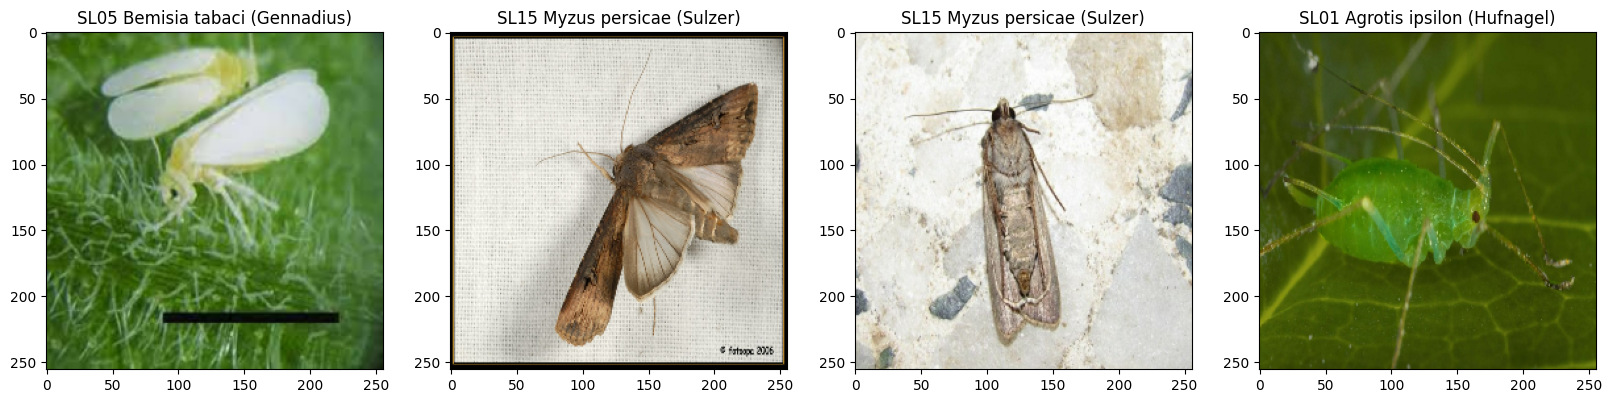

In [139]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    class_label = (batch[1][idx])
    ax[idx].title.set_text(class_names[class_label])

## 2. Processing 